#### _Speech Processing Labs 2020: Signals: Module 1_

In [15]:
## Run this first! 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import cmath
from math import floor
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
plt.style.use('ggplot')

## some helper functions:
from dspMisc import *

# 4 The Discrete Fourier Transform


### Learning Outcomes
* Understand the DFT equation: what input does it take and what outputs does it produce.

### Need to know
* Topic Videos: Series Expansion, Fourier Analysis, Frequency Domain
* Vector operations: dot product
* [Digital Signals: Sampling sinusoids](./sp-m1-3-sampling-sinusoids.ipynb)


<div class="alert alert-warning">
    <em> <strong>Optional-ish:</strong>  This notebook goes through the DFT equation in quite a lot of detail - more than is strictly necessary for this course.  It's perfectly fine to just focus on the visualizations or to skip it for now.  
    
That said, you might like to run the code anyway and look at the visualization of the different phasors (i.e. basis functions) that correspond to the different DFT outputs in the DFT work through section called [Generate Phasors](#genphasors), and the corresponding magnitude and phase response graphs for that example</em>
</div>

Do you remember learning a bunch of math (trig, algebra, calculus) in high-school and thinking you'll never have to use this? While you might not use it directly, a lot of the technology you use everyday depends on it.  Pretty much all current speech technology depends on the Fourier Transform in some way! It has been (and continues to be) used to solve problems in many different fields from from image processing to quantum mechanics

In the previous notebook, you looked at how you can add 'pure' sinusoids together to form complicated waveforms. The Fourier Transform gives us a way of doing the opposite: taking sequence of measurements over time (like a speech wave) and decomposing it into sinusoids of different frequencies, magnitudes, and phases. 

Since we are interested in digital signals (i.e. measuresment over discrete time steps), we'll need to use the **Discrete Fourier Transform**.  This makes it possible to actually do these calculations on a computer, but it does also lead to some unexpected side-effects. 

<div class="alert alert-warning">
<strong>Equation alert</strong>: If you're viewing this on github, please note that the equation rendering is not always perfect. You should view the notebooks through a jupyter notebook server for an accurate view.
</div>

## 4.1 The DFT equation 

You can think of the DFT as a machine that takes $N$ amplitude samples over time and returns the frequency spectrum of the input signal (just like you when you view a spectral slice in praat).

You can treat this as a black box. But, now that we've gone through complex numbers, phasors, etc we can look at how the machine works and, more importantly, what it's limitations are.

* Input: $x[n]$, for $n=1..N$ (i.e. a time series of $N$ samples)
* Output: N complex numbers $\mapsto$ magnitude and phases of specific phasors:

$$ 
\begin{align}
DFT[k] &= \sum_{n=0}^{N-1} x[n] e^{-j \frac{2\pi n}{N} k} \\
DFT[k] &= \sum_{n=0}^{N-1} x[n]\big[\cos(\frac{2\pi n}{N} k) - j \sin(\frac{2\pi n}{N} k) \big] 
\end{align}
$$

You'll usually see this written as $X[k]$ in signal processing textbooks, but we'll just say $DFT[k]$ to be a bit more transparent (and reduce the probability of typos!)

Notice the $-j$ in the phasor! This means as $n$ increases the 'clockhand' of the phasor is rotating clockwise! 


## 4.2 The DFT Step-by-Step

But what does the DFT do for us? Very broadly, the DFT takes a series of $N$ values in time as input (e.g. waveform amplitudes over time for our sound waves) and outputs the **correlations** between the input and $N$ pure cosine waves with specific frequencies.  That is, it tells you how you would weight (and shift) these cosine waves so that you can add them all up and recover the original input. 

_Let's break it down!_ 

### The DFT for $k=0$
Let's first look at the DFT for $k=0$: 

$$ 
\begin{align}
DFT[0] = \sum_{n=0}^{N-1} x[n] e^{-j \frac{2\pi n}{N} 0} 
\end{align}
$$

This is usually referred to as the **bias** term.  It tells us whether the input function is shifted up or down the amplitude axis (in a time v amplitude plot of the waveform). 

### Exercise: 

* Q: Why doesn't DFT[0] tell us anything about the frequency of the input? 

In [2]:
# Because the exponent is multiplied by 0

### The DFT for $k=1$: 

Now we can start to look at the correlation between the input sequence and some phasors of different frequencies.  For $k=1$, we have: 

$$ DFT[1] = \sum_{n=0}^{N-1} x[n] e^{-j \frac{2 \pi n}{N}}$$



Each of the $e^{j 2\pi n/N}$ terms in the sum is a step of $2\pi n/N$ radians around the circle.  That is, our $k=1$ phasor $e^{-j \frac{2 \pi}{N}n}$ makes completes 1 full circle every $N$ time steps. 


Let's plot the the $k=1$ phasor for $N=16$: 

In [16]:
## plot complex numbers in the DFT[1] equation
N=16

## make an array of N steps: 0,...,N
nsteps = np.array(range(N))
tsteps = 2*np.pi*nsteps/N
Tmin = np.min(tsteps)
Tmax = np.max(tsteps)

## Corresponding complex numbers z[n] = e^{j 2 pi n/N}
zn_k1 = np.exp(-1j*2*np.pi*nsteps/N) 


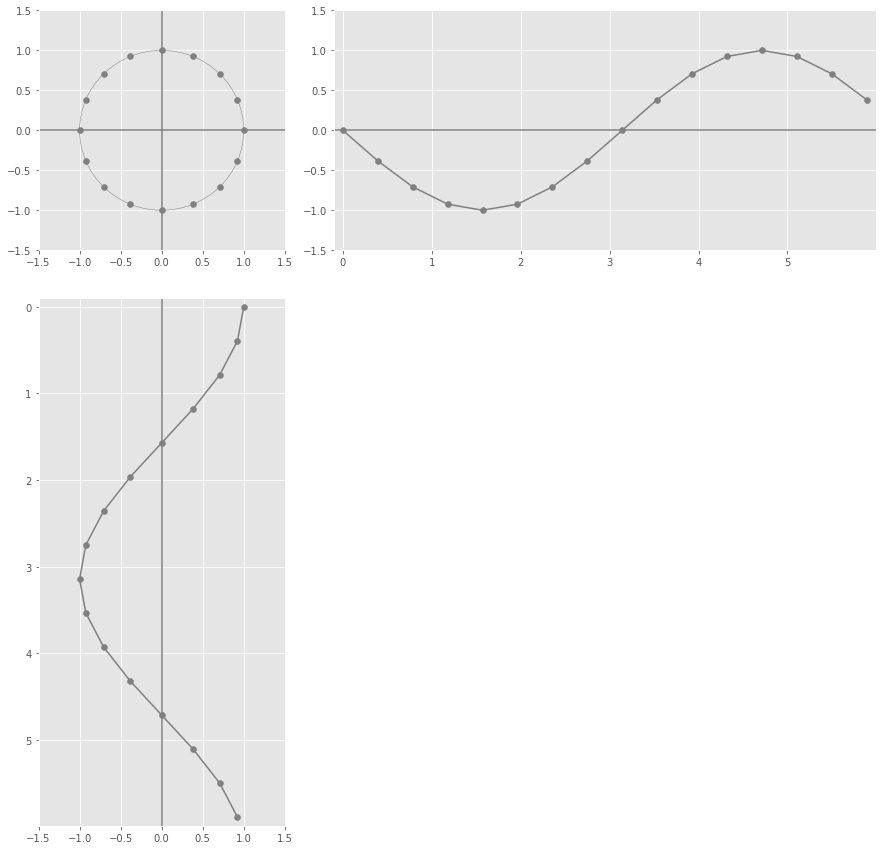

In [17]:
## Plot the phasor corresponding to DFT[k=1] 
X_k1, Y_k1, fig, phasor, iproj, rproj = plot_phasor_static(zn_k1, tsteps, plot_real=True, plot_imag=True)

In [18]:
## Animate the phasor! 
phasor1_vid = get_phasor_animation(X_k1, Y_k1, tsteps, phasor, iproj, rproj, fig)
phasor1_vid

What this animation shows is that for $k=1$, the $e^{-j\varphi}$ terms in the DFT represent $N$ evenly space samples around the unit circle aka one period of a sinusoid. So, The term $x[n] e^{-j2\pi n/N}$ represents multiplying the $n$th step around the unit circle with the $n$th input value.




### Exercise (optional)

We saw from Euler's formula previously that projecting the phasor (left fig) onto the imaginary (vertical) axis, would give us a sine wave, i.e. $\sin(t)$.  This isn't quite what we see above.  Instead the sinusoid on the right, looks like the mirror image of $\sin(t)$, i.e. $-\sin(t)$.  Why is this?  

### Notes

In [19]:
# Because it's clockwise instead of anti-clockwise

So, we can interpret the DFT as taking the dot product between the input and a cosine (and sine) wave of specific frequency.  That is, it tells us if the input sequence repeats itself  with a specific frequency.  




### The dot product with the input $x[n]$
It's useful at this point to break the DFT equation into two parts using Euler's rule. This esssentially gives us two dot products (i.e. elementwise multiplication and summation). This allows us to calculate the real and imaginary components of the DFT output separately as a dot product with a cosine (the real part) and a dot product with a sine (the imaginary part): 


$$ 
\begin{align}
DFT[1] &= \sum_{n=0}^{N-1} x[n] \big(\cos(2\pi n/N) -j\sin(2\pi n/N)\big)\\
&= \sum_{n=0}^{N-1} x[n] \cos(2\pi n/N) - j \sum_{n=0}^{N-1} x[n] \sin(2\pi n/N)
\end{align}
$$







### Example: 
Let's look at what's happening in these sum terms using a simple sampled square wave with the same period as the $k=1$ phasor for input.  The following visualizes the second sum (i.e. the dot product with $\sin(2\pi n/N)$).

x[n]: [-1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1]


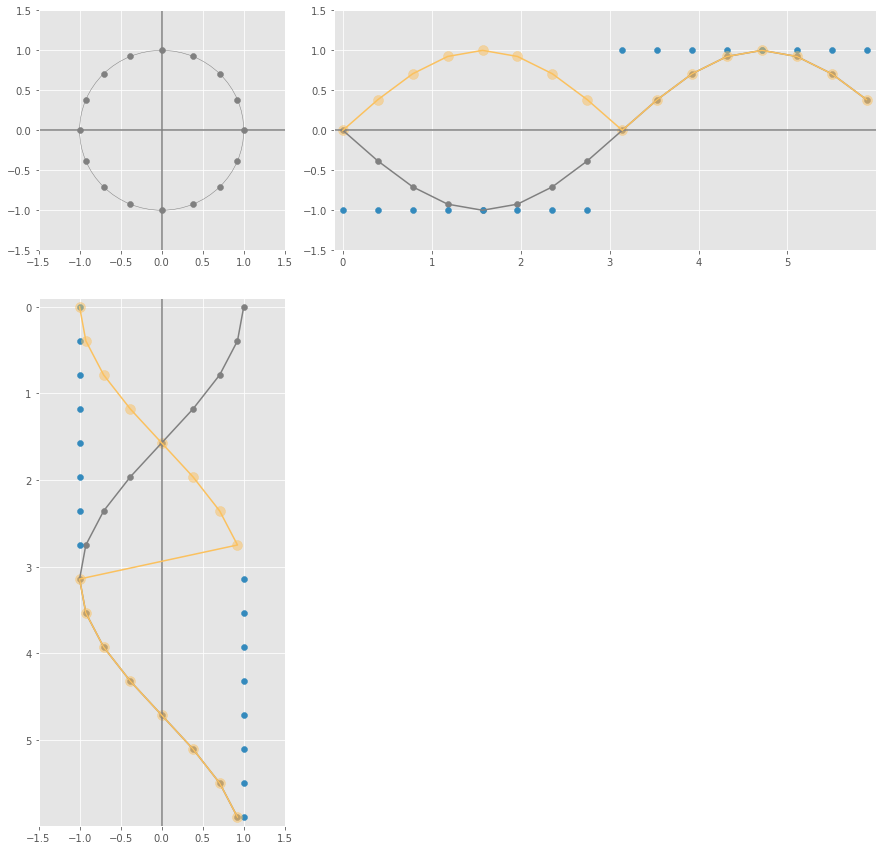

In [25]:

## Make the background and plot the k=1 phasor
X_k1, Y_k1, fig, phasor, iproj, rproj = plot_phasor_static(zn_k1, tsteps, plot_real=True, plot_imag=True)

## Now, let's say our input x looks like this square wave: 
xn = np.array([-1]*8 + [1]*8)

## Exercise: Try some other inputs later
#xn = np.array([-1, -1,-1,-1, 1, 1,1,1]*2)
#xn = np.array([-1]*4 + [1]*8 + [-1]*4)
#xn = np.array([1] + [-1, -1,-1, 1, 1,1,1]*2 + [-1])
#xn = zn_imag_k1
#xn = np.concatenate([Ys[np.arange(0, 16, 2)], Ys[np.arange(0, 16, 2)]])
#xn = np.array([1] + [-1, -1,-1, 1, 1,1,1]*2 + [-1])


print("x[n]:", xn)

## Plot the input x[n]:

# with respect to the imaginary component (top right)
iproj.scatter(tsteps, xn, color='C1')

# and the real component (bottom left)
rproj.scatter(xn, tsteps, color='C1')

## Do the elementwise multiplication of input (xn) and the k=1 phasor (zn_k1)
xn_times_zn = xn * zn_k1

## Get the real and imaginary parts
real_xn_zn = np.real(xn_times_zn)
imag_xn_zn = np.imag(xn_times_zn)

## Plot the imaginary parts = x[n]*sin(theta) (top right) in yellow
iproj.plot(tsteps, imag_xn_zn, color='C4')
iproj.scatter(tsteps, imag_xn_zn, color='C4', s=100, alpha=0.5)

## Plot the real parts = x[n]*cos(theta) (bottom left) in yello
rproj.plot(real_xn_zn, tsteps,  color='C4')
rproj.scatter(real_xn_zn, tsteps, color='C4', s=100, alpha=0.5)

In the plot above, you can see that: 
* The grey dots show our samples from the $k=1$ phasor (top left), and projected imaginary component, i.e. the sine in the DFT sum (top right), and the projected real component, i.e. the cosine (bottom left) 
* The blue dots show our input sequence (top right and bottom left)
* the yellow dots show the element wise multiplication of the phasor values and the input, projected on the imaginary and real axes.  

Let's just look at the imaginary (sine) part of the $x[n] \cdot z_1[n]$ multiplication (i.e., `xn_times_zn`): 
When we multiply the values in both sequences together, we can see that (1)  the values in the input and phasor don't exactly match, but (2) they are always the same sign. That is, the input and the sine component of the $k=1$ phasor are correlated to some extent. In this case, this means that the multiplication terms (in yellow) in this case are all positive. So, adding them all up will give us a positive term for the imaginary component of the DFT.  

We can also see that, even though we basically chose this example to match the sine component, we do also get a positive correlation with the real (cos) component.  

The following cell shows that you get the same result from doing the dot products with the real (cos) and imaginary (sin) parts of the phasor separately, or doing the dot product with the phasor and then projecting the real and imaginary parts. 


In [9]:
## The dot product: sum all the elementwise multiplications
dft_1_real = np.sum(real_xn_zn)
dft_1_imag = np.sum(imag_xn_zn)


print("* projection and then two separate products: DFT[k] = %f + i%f" %(dft_1_real, dft_1_imag))

## check these are the same!
dft_1 = np.sum(xn*zn_k1)
print("* one dot product and then projection: DFT[k] = %f + i%f" %(dft_1.real, dft_1.imag))

* projection and then two separate products: DFT[k] = -2.000000 + i10.054679
* one dot product and then projection: DFT[k] = -2.000000 + i10.054679


### Exercise: Change the input
What happens when we change the input `xn` so that:

* it has a different period
* exactly matches the sine component of the k=1 phasor
* is out of phase with the sine component of the k=1 phasor
* has a different magnitude
* something else ...

There are some commented out options that you can try in the cell above

### Notes

### Example: Phase shifted input

Let's see what happens when our input matches the imaginary component of $k=1$ phasor but has it's phase shifted a bit.  Remember, we can shift the start point of our phasor by multiply the whole phasor sequence a complex number. 

$$ \sin(\theta + \phi) = Imag(e^{j\phi}e^{j\theta}) = Imag(e^{j\theta+\phi})$$

In [26]:
## Let's generate our DFT[1] phasor for an input of N=16 points:
N=16

## make an array of N steps: 0,...,N
nsteps = np.array(range(N))
tsteps = 2*np.pi*nsteps/N

## The k=1 phasor: 
zn_k1 = np.exp(-1j*tsteps) 

Now let's create an input that's the same as the sine component of the DFT[1] phasor, but shifted by $\pi/3$ radians. 

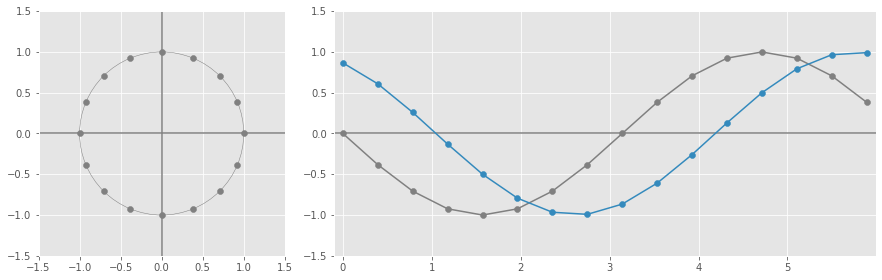

In [27]:
## Plot the DFT[1] phasor
X_k1, Y_k1, fig, phasor, iproj, rproj = plot_phasor_static(zn_k1, tsteps, plot_real=False, plot_imag=True)

## Now, for the input let's use a phase shifted version of the sine component of our phasor, zn (defined above)
# Remember that multiplying a complex number by e^{j theta} rotates it by theta degrees 
# (anticlockwise if theta is positive) 
# So to shift the whole sequence we just multiply everything in the sequence by the same complex number

## For this example, let's shift our -sin(2 pi n/N) by pi/3
zn_shift = np.exp(1j*np.pi/3) * zn_k1

## And take as input just the imaginary component of this shifted sine wave
xn = np.imag(zn_shift)

## Plot the phase shifted sine wave it in blue! 
iproj.scatter(2*np.pi*nsteps/N, xn, color='C1')
iproj.plot(2*np.pi*nsteps/N, xn, color='C1')


In the plot above, you should see the input (in blue) is the same as the sine component of the $k=1$ phasor but *phase shifted*. By multiplying everything by $e^{j\pi/3}$ _delays_ the our $-sin(\theta)$ function by $\pi/3$ seconds (in this example we're assuming that it takes $\theta$ seconds to travel $\theta$ degrees around the phasor). 

Now let's see how this effects the DFT output: 

DFT[1] = 6.928203 + i4.000000
in polar coordinates: magnitude=8.000000, phase=0.523599


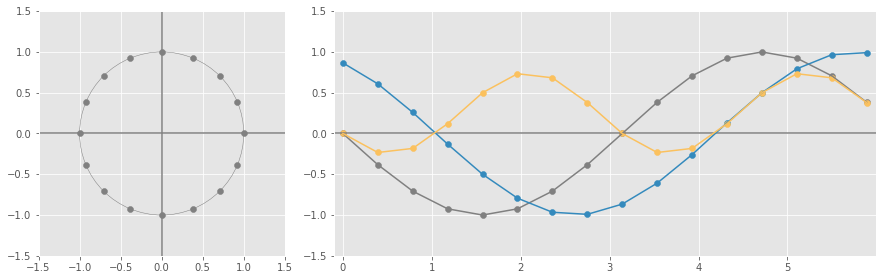

In [28]:
 ## Elementwise multiplication of the input and the k=1 phasor
xn_times_zn = xn * zn_k1

## Add it all up to get the dot product
dft_1 = np.sum(xn_times_zn)

print("DFT[1] = %f + i%f" %(dft_1.real, dft_1.imag))
print("in polar coordinates: magnitude=%f, phase=%f" %cmath.polar(dft_1))

## Plot the sequence of multiplications (yellow)
iproj.plot(2*np.pi*nsteps/N, np.imag(xn_times_zn), color='C4')
iproj.scatter(2*np.pi*nsteps/N, np.imag(xn_times_zn), color='C4')
fig

The result of the DFT is 6.93 + j4, which in polar coordinates has a magnitude=8 and phase angle=0.52  

* Non-zero magnitude means that the input has a frequency component that matches the frequency of the $k=1$ phasor
* Non-zero phase means that the input is like the $k=1$ phasor in frequency, but starting from a different starting angle.  

### How does the detected phase angle relate to the phase we used to shift the input? 

The magnitude of the DFT output is relatively straightforward to interpret.  The bigger the magnitude, the bigger the amplitude of this frequency component in the input. 

When we convert the $DFT[1]$ output to polar coordinates we can, as before, interpret $DFT[1]$ as a scaling (magnitude) and rotation (phase) factor.  We can think of the phase as signalling a bigger amplitude of this frequency in the the input.   We can think of the phase angle as rotating the starting position of the DFT[1] phasor 'clock hand' by that angle. When we convert this to time vs amplitude, this essential means starting from a future point in the sinusoid for positive phase (or a past point for negative phase) relative to the direction the phasor is rotating. 

###  DFT phase is relative to cosine! 

An important thing to note is that the phase output of the DFT is relative to the **cosine** function with the same frequency as the phasor. This is why the phase value we calculated isn't actually the same as the angle we used to shift the input sequence ($\pi/3=1.047$ radians), since that input sequence was actually based on a sine function.   




### Exercise (optional) 



Show that our input above $-\sin(t-\pi/3)$ is the same as a cosine wave with the phase shift derived above $\pi/6$.
You'll need to use these trig identities: 
$$ \cos(\alpha - \pi/2) = \sin(\alpha) $$
$$\sin(t+\pi) = -\sin(t)$$

**Note** We definitely won't be asking you do these sorts of calculations for assessment, but going through it will help consolidate your intutions about sinusoids and the relationship between cosine and sine waves.




### Notes


Even if you don't do the exercise above, we can see that shifting a cosine function by the DFT output phase gives us the same sinusoid as our input. 

That is: 
$$ \cos(t + \pi/6) = -\sin(t-\pi/3)$$

just by plotting them:


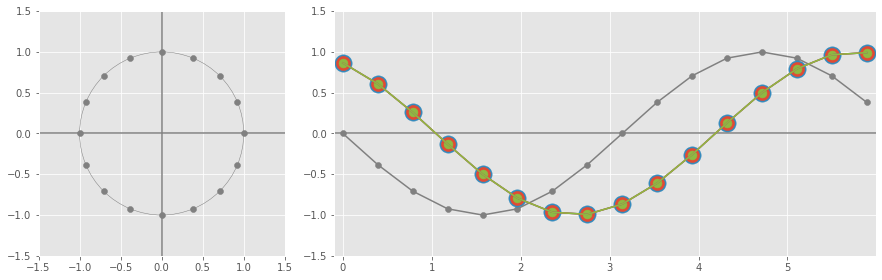

In [29]:
## Plot the input from above and the equivalent cos and sin function based on DFT phase output. 
_, _, fig, phasor, iproj, rproj = plot_phasor_static(zn_k1, tsteps, plot_real=False, plot_imag=True)


#fig, phasor, iproj, rproj = create_phasor_iproj_bkg(Tmin, Tmax, ymax=1.5)
#phasor.scatter(zn_real_k1, zn_imag_k1)

## Our input (C1=blue)
tsteps = 2*np.pi*nsteps/N
iproj.scatter(tsteps, xn, color='C1', s=300)
iproj.plot(tsteps, xn, color='C1')

## cos(t + pi/6) (C0=red)
iproj.scatter(tsteps, np.cos(tsteps+np.pi/6), color='C0', s=200)
iproj.plot(tsteps, np.cos(tsteps+np.pi/6), color='C0')

## -sin(t-pi/3) (C5=green)
iproj.scatter(tsteps, -np.sin(tsteps-np.pi/3), color='C5', s=80)
iproj.plot(tsteps, -np.sin(tsteps-np.pi/3), color='C5')

In the plot above, you should see:
* the DFT[1] phasor in grey, i.e. $-\sin(t)$
* Our phase shifted input in blue
* The phase shift determined by DFT[1] applied as a cosine wave: $\cos(t + \pi/6)$ in red
* Our phase shifted input generated directly using the `np.sin` function: $-\sin(t-\pi/3)$ in green

You should see is that that the last three functions are all the same! We can always write a sine wave as a cosine wave with a phase shift. 

### The DFT for k = 2 and beyond

We can think of DFT[2] as representing the contribution of a phasor that spins around the unit circle
twice as fast as the $k=1$ DFT phasor:

* For $k=2$, Each $e^{i \frac{2\pi n}{N}k}$ is a step of $\frac{2\pi}{N}\times 2$ radians around the unit circle
    * i.e. we only sample every second point compared to the $k=1$ case.
    
* This means it only takes half the time to make a full cycle. So, this phasor represents a sinusoid with twice the frequency of the one for $k=1$


### Exercise:
Plot sinusoids for different values of `k` using the code below
* What happens when $k=N/2$?
* What happens when $k > N/2$? 
* What if you increase $N$?
* How many actual frequencies can the DFT actually tell us about? 
* How does this relate to the aliasing problem we saw in the previously? 

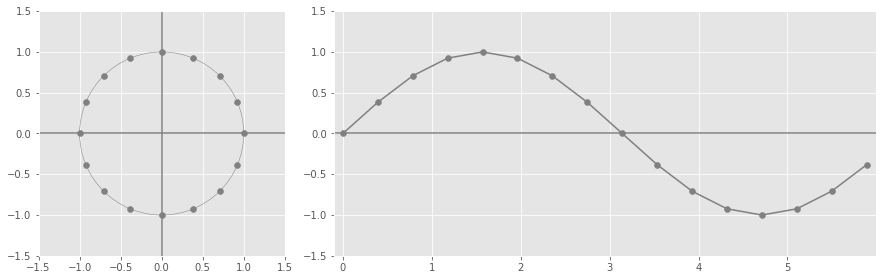

In [65]:
## Plot the phasor and sinusoid for different values of k

## Number of samples
N=16

## DFT output we're looking at: a sinusoid with k times the freq of the k=1 phasor
k=15

## indices of points in sample
nsteps = np.array(range(N))

## times of samples
tsteps = 2*np.pi*nsteps/N

## N sample values of the kth DFT phasor
zn_k = np.exp(k*-1j*tsteps) 

X_k, Y_k, fig, phasor, iproj, rproj = plot_phasor_static(zn_k, tsteps, plot_real=False, plot_imag=True)


In [47]:
kphasor_anim= get_phasor_animation(X_k, Y_k, tsteps, phasor, iproj, rproj, fig)
kphasor_anim

### Notes

## 4.3 The full DFT

Now that we've seen what happens when we calculate the individual DFT components, lets do the whole thing!

We need


1. **Input:** a sequence of $N$ samples
1. generate $N$ phasors, with $N$ sampled points
1. generate $N$ dot products between the input and the phasors
1. **Output:** $N$ complex numbers representing magnitude and phase 

The magnitudes and phases give us the decomposition of the input into pure cosine waves



### Set the input $x[n]$

Let's use the same input as above $x[n] = -\sin(2\pi n/N -\pi/3)$

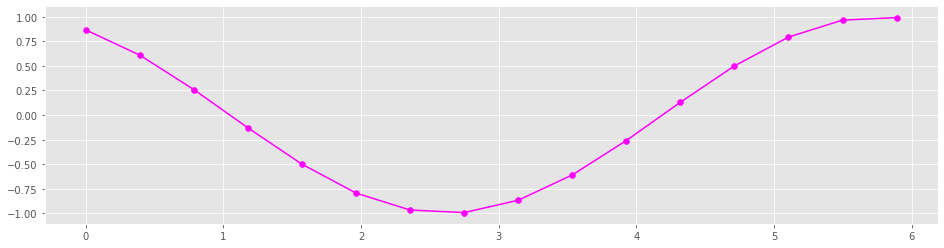

In [66]:
## 1) Input: -sin(t-pi/3) as above
N=16
nsteps = np.array(range(N))
theta_step = 2*np.pi/N
theta_steps = theta_step * nsteps

## set the phase shift
phase_in = np.pi/3

## set the input as -sin with phase shift
x = -np.sin(theta_steps-phase_in) 

## Plot the input x
fig, tdom = plt.subplots(figsize=(16, 4))
tdom.scatter(tsteps, x, color='magenta')
tdom.plot(tsteps, x, color='magenta')


You should see the input (16 points), `x`, plotted in magenta 

### Generate phasors
<a name="genphasors"></a>
Let's use some functions to generate all the DFT phasors in one go: 

In [67]:
## 2) Generate the phasors
# Given a sequence length N, return dictionary representing N DFT outputs
# the kth element of the return dictionary contains the complex numbers sampled around the unit circle after 
# N steps, their real and imaginary parts, and the angles of those complex numbers (magnitude is always 1)
def get_dft_phasors(N, centered=False):
    
    ## N input steps, N phasors
    nsteps = np.array(range(N))
    
    ## DFT works for negatively indexed samples, i.e. x[-n], but we don't need this right now! 
    if centered:
        nsteps = nsteps - floor(N/2)
        print(nsteps)
    
    # We know the smallest step around the unit circle we can take is 2pi/N
    theta_step = 2*np.pi/N
    # And we're going to take N steps
    theta_steps = theta_step * nsteps
    
    ## Generate N phasors
    phasors = {}
    for k in range(N):
        ## samples around the unit circle
        zs = np.exp(k*-1j*theta_steps) 
        real = np.real(zs)
        imag = np.imag(zs)    
        
        ## Since we're here, let's return all these things for convenience
        # zs: the phasor samples, real: the real component, imag: the imaginary component
        # theta_steps: the angles for each phasor sample, theta_step: the smallest angle step size
        
        phasors[k] = {'zs':zs, 'real':real, 'imag':imag, 'thetas':theta_steps, 'theta_step':theta_step}
        
    return phasors



In [68]:
## get the list of phasors
phasors = get_dft_phasors(N)

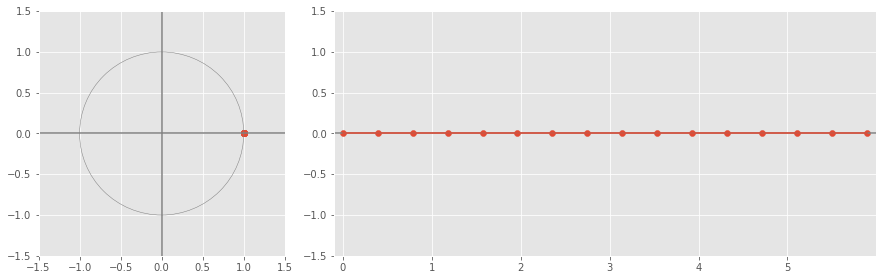

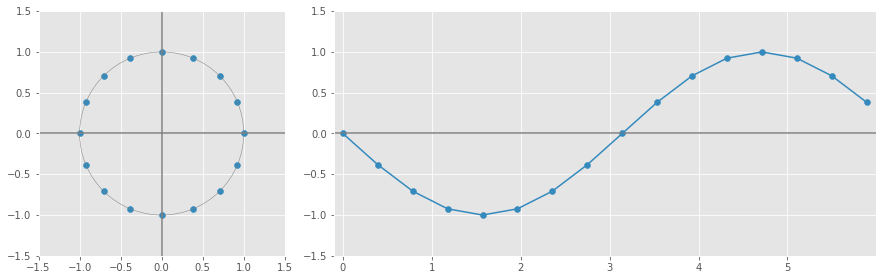

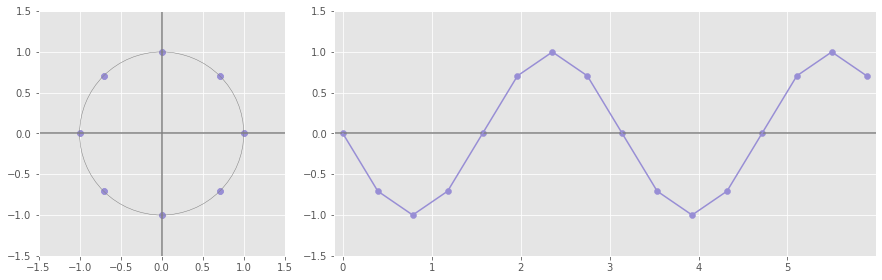

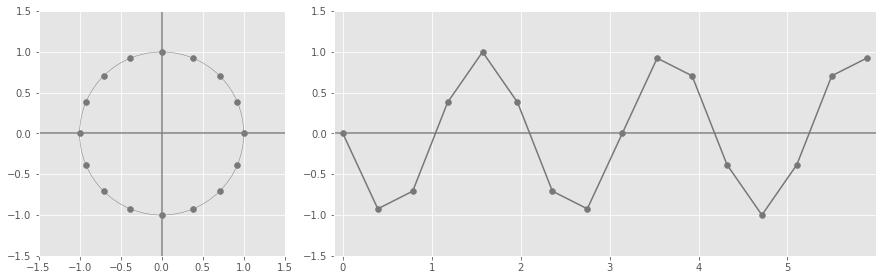

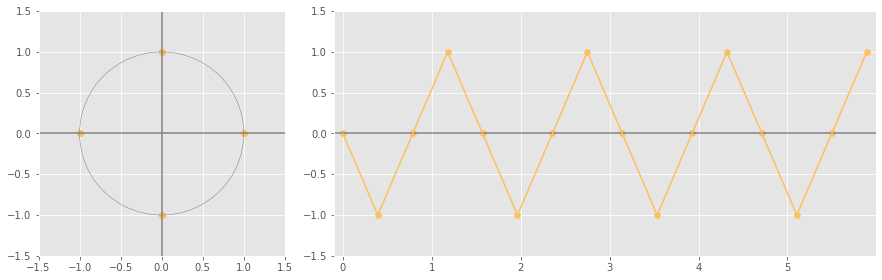

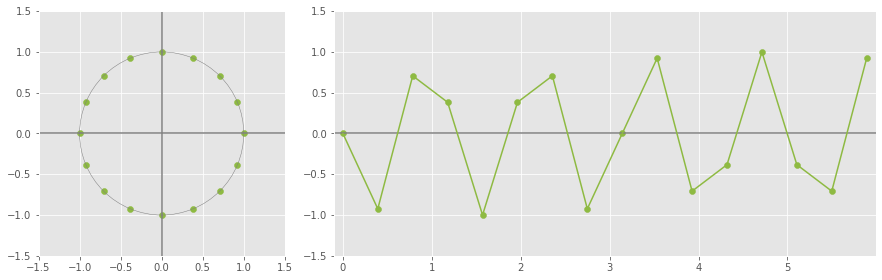

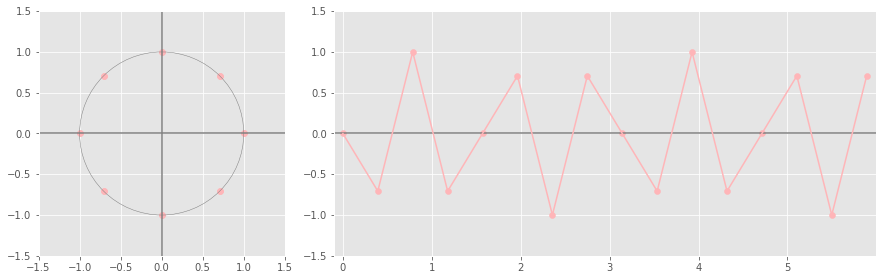

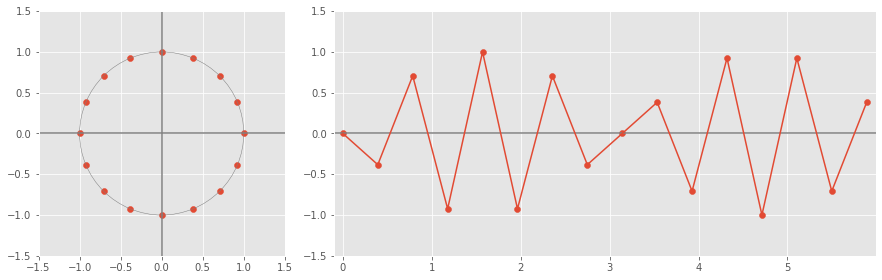

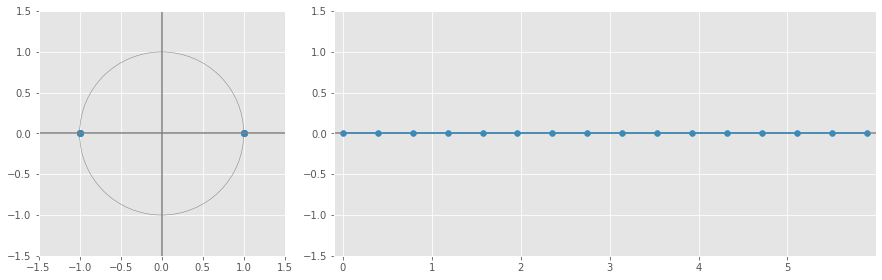

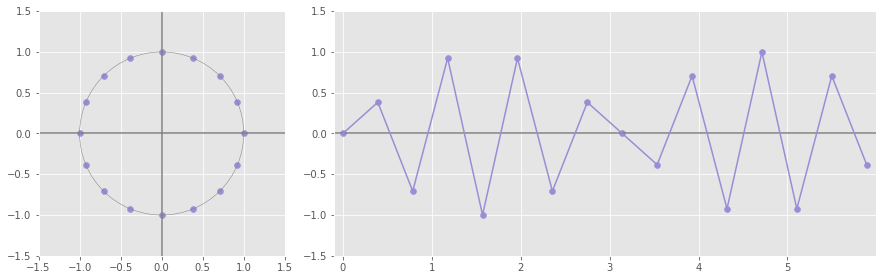

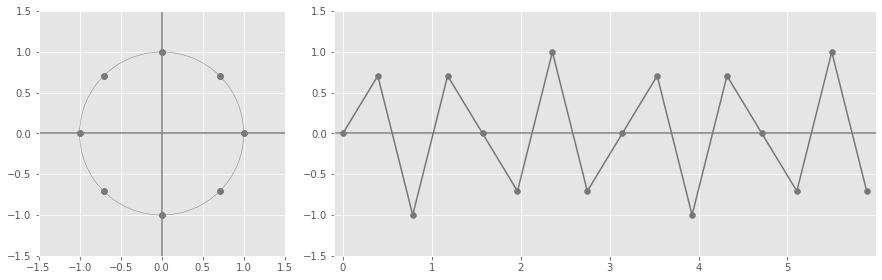

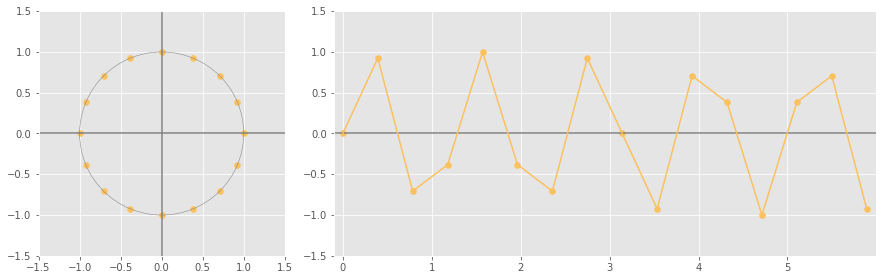

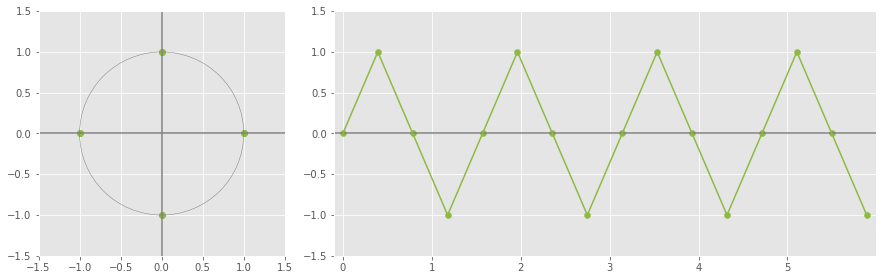

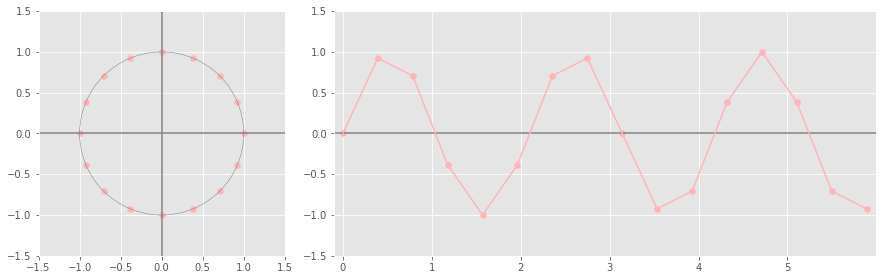

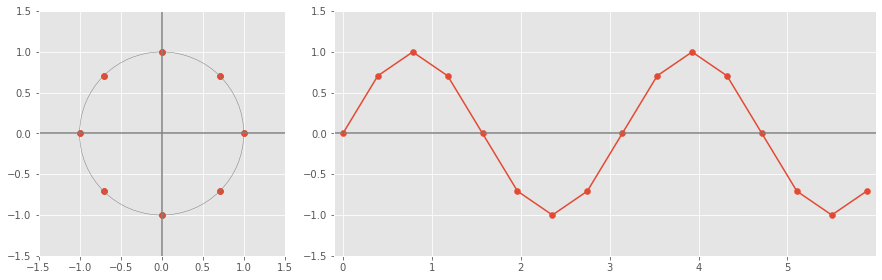

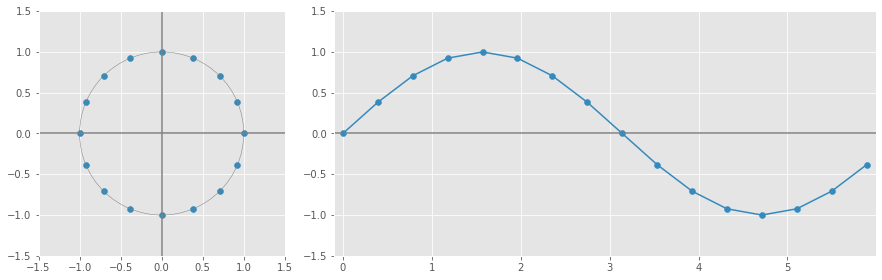

In [69]:
## plot the different phasors and sine (imaginary) components
## You should be able to see the frequency relationship between each DFT component
for k in range(N):
    X_k, Y_k, fig, phasor, iproj, rproj = plot_phasor_static(phasors[k]['zs'], tsteps, plot_real=False, plot_imag=True, color='C'+str(k))



You should see in the plots above that phasors $k > N/2$ repeat the frequencies we see for $k < N/2$. For example, 
the $k=1$ phasor is equivalent in frequency to the $k=15$ phasor! 

### Calculate dot products (i.e.  input and phasor correlations) 

In [75]:
## 3) Get the dot products for each for each phasor and the input

def get_dft_outputs(x, phasors):
    DFT = []
    
    ## Go through our list of N phasors
    for k, phasor in phasors.items():
        
        ## Do the dot product between the input and each phasor sequence
        DFT.append(np.sum(x * phasor['zs']))

    return DFT



In [76]:
## do the DFT
dft = get_dft_outputs(x, phasors)

### Get the output  magnitudes and phases

Now we convert the results of the dot products we just calculated into polar form to get magnitudes and phases. We can then plot them! 

In [77]:
## convert to polar coordinates to get magnitude and phase
dft_polar = [cmath.polar(z) for z in dft]
mags = [m for m, _ in dft_polar]
phases = [ph if mag > 0.00001 else 0 for mag,ph   in dft_polar]

## we need to put a condition into the phase calculation because phase is calculated by 
## a ratio of the imaginary component and the real component. Both of these values might be very, very small. 
## This makes it susceptible to floating point errors. 
## Then, the ratio of two very small things can actually end up to be quite (spuriously) big! 


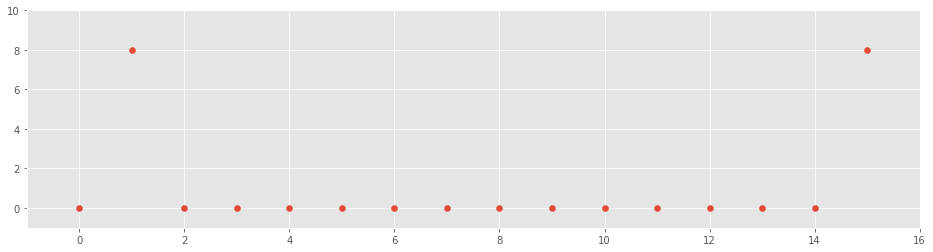

In [78]:
## Plot the magnitudes
#print(mags)
fig, freqdom = plt.subplots(figsize=(16, 4))
freqdom.set(xlim=(-1, N), ylim=(-1, 10))
freqdom.scatter(range(N), mags)

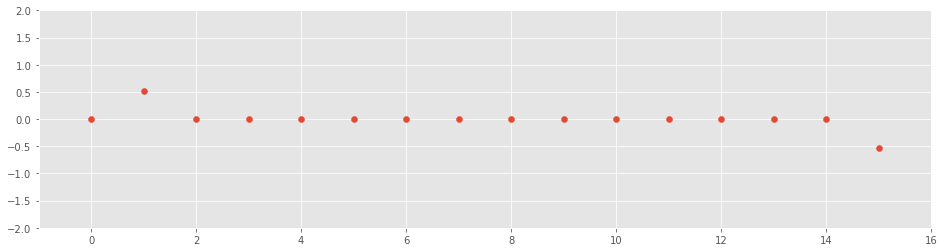

In [74]:
## plot the phase angle for each DFT component
#print(phases)
fig, fdom = plt.subplots(figsize=(16, 4))
fdom.set(xlim=(-1, N), ylim=(-2, 2))
fdom.scatter(range(N), phases)

### How do we interpret the magnitude and phase graphs? 

The top plot shows the magnitude response of the DFT with respect to our input.  The bottom plot shows the phase respose. 

The magnitude plot shows positive magnitudes for the 1st and the N-1th DFT components, and zero for all the rest.  This means that the input is a sinusoid with the same frequency as the 1st DFT component. 

The positive phase for the first component indicates a phase shift.  We see the opposite phase shift for the 15th component because the phasor for that has the same frequency but rotates the opposite way.  

So, this is what we expect since we generated the input as exactly the sine projection of the k=1 phasor, just shifted by $\pi/3$ radians! 



### Plotting DFT outputs on the complex plane
So far, we've looked at the real and imaginary components of the DFT outputs separately.  But we can also think about their properties on the complex plane. 

The following plots the DFT outputs for the example above on the complex plane. 


k=1, 6.928203 + j4.000000
k=15, 6.928203 + j-4.000000


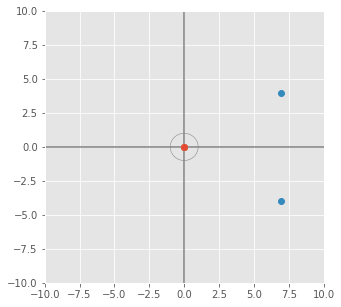

In [79]:
## Plot the actual DFT outputs as complex numbers on the complex plane
## For the example above, we can see that most of the outputs are at (0,0), i.e. not contribution
## but we get positive magnitudes for the 1st and 15th component, with the same 
## magnitude by 'mirrored' phase angle: 

ymax=(N/2) + 2
fig, ax = plt.subplots(figsize=(5, 5))
ax.set(xlim=(-10, 10), ylim=(-10, 10))
ax.plot([-ymax,ymax], [0,0], color='grey')
ax.plot([0,0],[-ymax,ymax], color='grey')
circle1 = plt.Circle((0, 0), 1, color='grey',fill=False)
    
ax.add_artist(circle1)

for k in range(N):
    zs = phasors[k]['zs']
    xz = x * zs
    dftk = sum(xz)
    #print(dftk, dftk.real, cmath.polar(dftk))
    ax.plot(dftk.real, dftk.imag, 'o')
    
    if dftk.real > 0.0001: 
        print("k=%d, %f + j%f" % (k, dftk.real, dftk.imag))



You can see from this plot that all but two of the DFT outputs have zero magnitude.  The two that have non-zero magnitude are the 1st and 15th components.  You can see that they have the same magnitude, but mirror each other in phase (they are complex conjugates). This symmetry is something you see a lot of in digital signal processing.  We won't go into it in this class, but for one thing we can take advantage of to save some computations!   

### Exercise (optional) 

You can use the code below to visualize the dot products of the input with with cos (real) and sin (imaginary) parts of each DFT component by varying $k$: 

* What's the relationship between the DFT phasors for $k=1$ and $k=N-1$ in terms of the dot product between the real (left plot) and imaginary (right plot) components.
* What's happen for components that don't have the same frequency as the input? e.g. $k=2$

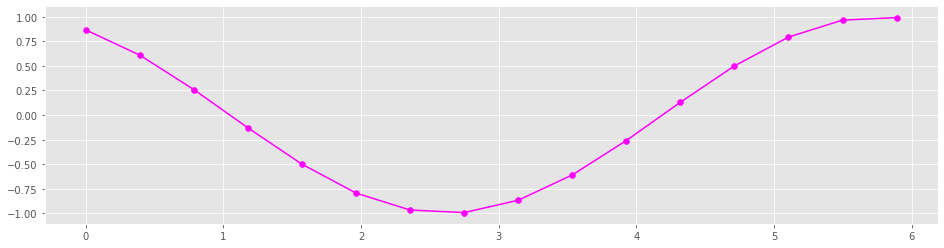

In [80]:
## 1) Input: -sin(t-pi/3) as above
nsteps = np.array(range(N))
theta_step = 2*np.pi/N
theta_steps = theta_step * nsteps

Tmin = np.min(theta_steps)
Tmax = np.max(theta_steps)

phase_in = np.pi/3
x = -np.sin(theta_steps-phase_in) 

fig, tdom = plt.subplots(figsize=(16, 4))
tdom.scatter(tsteps, x, color='magenta')
tdom.plot(tsteps, x, color='magenta')


dft[15] = 6.928203 + j-4.000000 


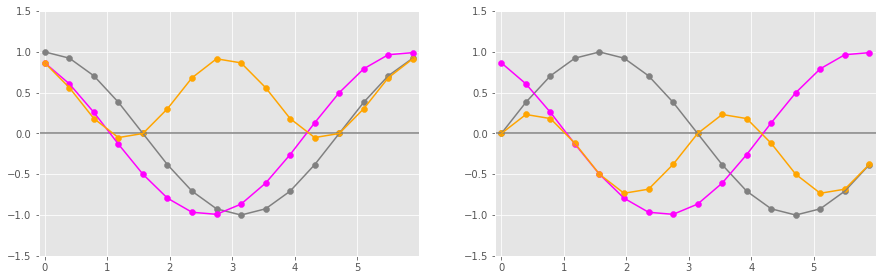

In [81]:
## let's break it down into cos and sin components
k=15

## zcos is our sampling of the real part of the kth phasor
zcos = phasors[k]['real']
zsin = phasors[k]['imag']


## the elementwise multiplication between the input x and the real part of the phasor, zcos
xz_real = x * zcos
xz_imag = x * zsin

## This initializes our plots, makes them the appropriate size etc, but leave the plot empty
_, _, fig, phasor, iproj, rproj = plot_phasor_static(phasors[k]['zs'], tsteps, plot_phasor=False, plot_real=True, plot_imag=True, color='grey')


## plot the zero line: if the sequence we get after the elementwise multiplication is 
## symmetric around zero, we know that the dot product will be zero since we're adding all the 
## values together
#inusoid.plot([Tmin-1,Tmax+1], [0,0], color='grey')


## Plot the input in magenta
rproj.plot(tsteps, x, color='magenta')
rproj.scatter(tsteps, x, color='magenta')


## Plot the elementwise multiplication in orange
rproj.plot(tsteps, xz_real, color='orange')
rproj.scatter(tsteps, xz_real, color='orange')

## Plot the input in magenta
iproj.plot(tsteps, x, color='magenta')
iproj.scatter(tsteps, x, color='magenta')

## Plot the elementwise multiplication in orange
iproj.plot(tsteps, xz_imag, color='orange')
iproj.scatter(tsteps, xz_imag, color='orange')

## Add it all up to get the dot product
dftk_real, dftk_imag = sum(xz_real), sum(xz_imag)
print("dft[%d] = %f + j%f "  % (k, dftk_real, dftk_imag))

### Notes